<a href="https://colab.research.google.com/github/syma-afsha/Machine_Learning/blob/main/Syma_Afsha__04_Decision_Trees.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DECISION TREES**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. A tree can be seen as a piecewise constant approximation.



---



In this Notebook we are going to see how this algorithm works with a simple example, using the Python library "scikit-learn", especifically the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html).

First, we are going to import some libraries and functions that we will use:


*   **Numpy**, that allows us to work with arrays
*   The **"Scikit-learn"** library that provides a group of functions related to Decision Trees and dataset splitting
*   **Graphviz**, that will allow us to plot the Decision Trees
* **io**, that allows us to navigate files
*  **Pandas**, that allows us to work with dataframes

In [ ]:
import numpy as np
from sklearn import tree
from sklearn.model_selection import train_test_split
import graphviz
import io
import pandas as pd

## **DATA DEFINITION**

In this activity we have a dataset of medical diagnoses based on having some of these five different symptoms, in order:


*   Temperature
*   Sore throat
*   Cough
*   Headache
*   Muscle pain

The possible diagnoses are:


*   Covid
*   Flu
*   Cold
*   Other

Here we have a set of parameters ***(XTrain)*** consisting of five different values (one for each symptom presented previously) where 0 is not having the symptom and 1 is having it. For each set of parameters we have a diagnose ***(yTrain)*** of the previously listed diagnoses. Here we can see a table containing this data:

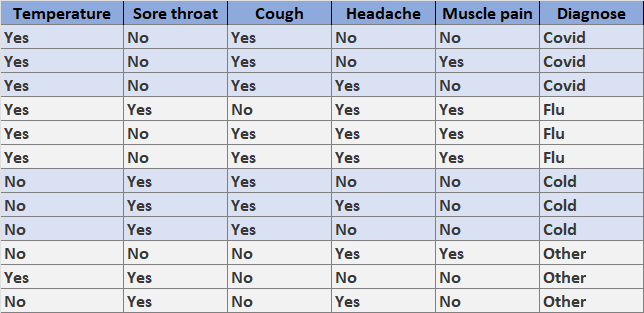




In [ ]:
# Parameters of training data
XTrain = np.array([[1, 0, 1, 0, 0], [1, 0, 1, 0, 1], [1, 0, 1, 1, 0],\
                   [1, 1, 0, 1, 1], [1, 0, 1, 1, 1], [1, 0, 1, 1, 1],\
                   [0, 1, 1, 0, 0], [0, 1, 1, 1, 0], [0, 1, 1, 0, 0],\
                   [0, 0, 0, 1, 1], [1, 1, 0, 0, 0], [0, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

To start, we have an example of how to create a basic DT using the ["Tree" module](https://scikit-learn.org/stable/modules/tree.html), specifically the **"DecisionTreeClassifier"**. Next, the DT is exported as text and displayed. ***Try changing the criterion to get the information gain (entropy).***

In [ ]:
# Fit the classifier
# TO DO: Change the criterion to information gain
clf = tree.DecisionTreeClassifier(criterion='entropy') #_________TO DO__________
clf = clf.fit(XTrain, yTrain)

# Export and print the DT
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)

|--- Temperature <= 0.50
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  0.50
|   |--- Muscle pain <= 0.50
|   |   |--- Sore throat <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Sore throat >  0.50
|   |   |   |--- class: Other
|   |--- Muscle pain >  0.50
|   |   |--- Headache <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Headache >  0.50
|   |   |   |--- class: Flu



The ["Tree" module](https://scikit-learn.org/stable/modules/tree.html) allows us to plot the tree, as follows:

[Text(0.4090909090909091, 0.875, 'x[0] <= 0.5\nentropy = 2.0\nsamples = 12\nvalue = [3, 3, 3, 3]'),
 Text(0.18181818181818182, 0.625, 'x[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 0, 0, 2]'),
 Text(0.09090909090909091, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2]'),
 Text(0.2727272727272727, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0]'),
 Text(0.6363636363636364, 0.625, 'x[4] <= 0.5\nentropy = 1.449\nsamples = 7\nvalue = [0, 3, 3, 1]'),
 Text(0.45454545454545453, 0.375, 'x[1] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [0, 2, 0, 1]'),
 Text(0.36363636363636365, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0]'),
 Text(0.5454545454545454, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 0, 1]'),
 Text(0.8181818181818182, 0.375, 'x[3] <= 0.5\nentropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.7272727272727273, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0]'),
 Text(0.9090909090909091, 0.125, 'entropy = 0.0\nsamples = 3\n

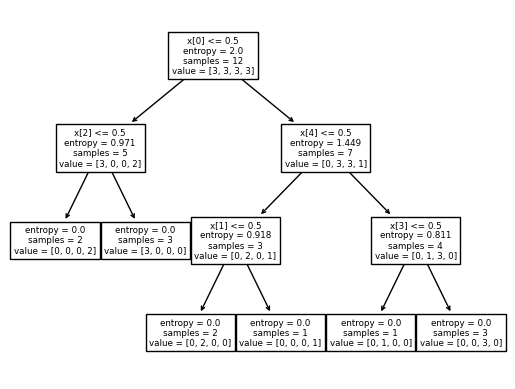

In [ ]:
# Plot the decision tree
tree.plot_tree(clf)

The previous plot of the decision tree isn't very easy to understand, so we are going to use the [**"graphviz"** library](https://www.graphviz.org) to plot the DT, as it allows to plot the parameters and the class names. Also it supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. **Search and apply the parameter that defines how to paint the nodes to indicate majority class for classification (different color for each class).**

In [ ]:
clf.classes_


array(['Cold', 'Covid', 'Flu', 'Other'], dtype='<U5')

In [ ]:
class_names=[str(class_label) for class_label in clf.classes_]

In [ ]:
class_names

['Cold', 'Covid', 'Flu', 'Other']

|--- Temperature <= 0.50
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  0.50
|   |--- Muscle pain <= 0.50
|   |   |--- Sore throat <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Sore throat >  0.50
|   |   |   |--- class: Other
|   |--- Muscle pain >  0.50
|   |   |--- Headache <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Headache >  0.50
|   |   |   |--- class: Flu



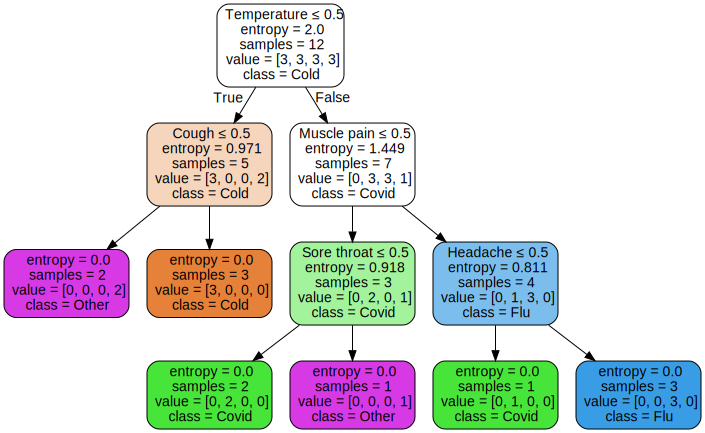

In [ ]:
# Export the tree data
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)
# TO DO: Apply the parameter that defines how to paint the nodes to indicate majority class for classification
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],
                     class_names=clf.classes_, rounded=True,
                     special_characters=True, filled= True)  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

Observe the decision tree generated and answer the following questions:


*   What is the most likely diagnose if the patient only has a temperature, a headache and muscle pain?
*   What is the most likely diagnose if the patient only has a temperature and coughs?
*   What is the most likely diagnose if the patient only coughs and has a sore throat?
*   What is the most likely diagnose if the patient only has a temperature?


After you answer, use the DT classifier defined to answer these questions again and check if you were correct.



<font color="red">

1.   Flu  is the most likely diagnose if the patient only has a temperature, a headache and muscle pain.
2. Covid is the most likely diagnose if the patient only has a temperature and coughs.
3. Cold is the most likely diagnose if the patient only coughs and has a sore throat.
<font color="red">
4.Covid is the most likely diagnose if the patient only has a temperature.

Using the DT classifier, the output is same as my answers.
</font>







In [ ]:
# TO DO: Define the parameters for each prediction
XTest = [[1, 0, 0, 1, 1], [1, 0, 1, 0, 0], [0, 1, 1, 0, 0], [1, 0, 0, 0, 0]]# ________TO DO_________

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Covid'], dtype='<U5')

Now try to create the same DT but using the actual temperature of each patient. ***Do you get the same DT? Are the answers to the previous questions the same?***

# <font color="red">
After creating the same DT and using the actual temperature of each ptient, I have got the same DT. Yes, the answers are the same.
</font>

|--- Temperature <= 36.90
|   |--- Cough <= 0.50
|   |   |--- class: Other
|   |--- Cough >  0.50
|   |   |--- class: Cold
|--- Temperature >  36.90
|   |--- Muscle pain <= 0.50
|   |   |--- Sore throat <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Sore throat >  0.50
|   |   |   |--- class: Other
|   |--- Muscle pain >  0.50
|   |   |--- Headache <= 0.50
|   |   |   |--- class: Covid
|   |   |--- Headache >  0.50
|   |   |   |--- class: Flu



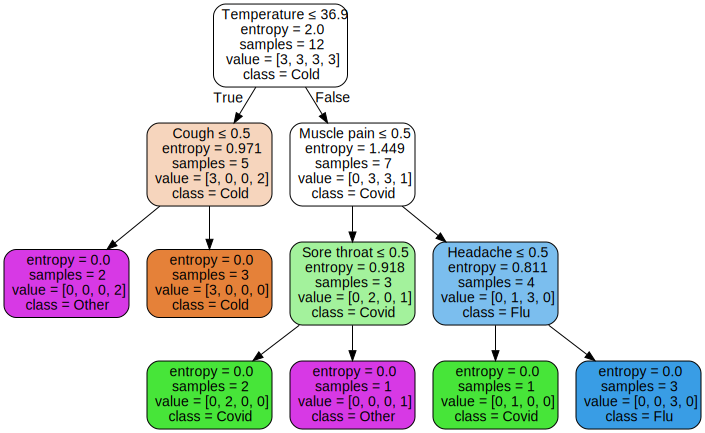

In [ ]:
# Parameters of training data
XTrain = np.array([[38.6, 0, 1, 0, 0], [37.9, 0, 1, 0, 1], [37.5, 0, 1, 1, 0],\
                   [39.0, 1, 0, 1, 1], [37.2, 0, 1, 1, 1], [38.4, 0, 1, 1, 1],\
                   [36.1, 1, 1, 0, 0], [35.8, 1, 1, 1, 0], [36.4, 1, 1, 0, 0],\
                   [36.6, 0, 0, 1, 1], [37.3, 1, 0, 0, 0], [35.7, 1, 0, 1, 0]])

# Ground truth of training data
yTrain = np.array(["Covid", "Covid", "Covid", "Flu", "Flu", "Flu", "Cold", "Cold", "Cold", "Other", "Other", "Other"])

# TO DO: Create and fit the classifier
clf = tree.DecisionTreeClassifier(criterion='entropy') #_________TO DO__________
clf = clf.fit(XTrain, yTrain)
# TO DO: Plot the resulting tree
#________TO DO_________
# Export the tree data
r = tree.export_text(clf, feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"])
print(r)
# TO DO: Apply the parameter that defines how to paint the nodes to indicate majority class for classification
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=["Temperature", "Sore throat", "Cough", "Headache", "Muscle pain"],
                     class_names=[str(class_label) for class_label in clf.classes_], rounded=True,
                     special_characters=True, filled= True)  #________TO DO__________
# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

Now test your classifier with these data. ***What results do you get?***

# <font color="red">
Testing my classifier, I have got the same results as the previous one.
output is : ['Flu', 'Covid', 'Cold', 'Covid']
</font>

In [ ]:
# Define the parameters for each prediction
XTest = [[38.1, 0, 0, 1, 1], [37.8, 0, 1, 0, 0], [36.3, 1, 1, 0, 0], [37.9, 0, 0, 0, 0]]

# TO DO: Predict the diagnoses
clf.predict(XTest)

array(['Flu', 'Covid', 'Cold', 'Covid'], dtype='<U5')



---



Now we are going to work with a larger dataset. The dataset is a public dataset coming from Cleveland database that you can download from the subject platform in the Moodle.

It contains 14 columns (one per attribute). The attributes are related to the patient health state. They are the following:


1.	age
2.	sex
3.	chest pain type (4 values)
4.	resting blood pressure
5.	serum cholestoral in mg/dl
6.	fasting blood sugar > 120 mg/dl
7.	resting electrocardiographic results (values 0,1,2)
8.	maximum heart rate achieved
9.	exercise induced angina
10.	oldpeak = ST depression induced by exercise relative to rest
11.	the slope of the peak exercise ST segment
12.	number of major vessels (0-3) colored by flourosopy
13.	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14.	target ( 1=ill, 0=helathy)


The dataset contains the information of 303 patients.

First, run the following cell and load the "heart.csv" file from your disk.


In [ ]:
# TO DO: load "heart.csv" file from disk
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


Run this cell to load the data and generate a training and testing dataset that will be later used to generate the classsifier.

In [ ]:
# Sort the dataset in a Pandas Dataframe
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))

# Divide the dataset in 70% training and 30% testing
df_train, df_test = train_test_split(df, test_size=0.3)

# Extract the names of the atributes of the dataset
X_list = df_train.columns.values.tolist()
# Extract the name of the ground truth atribute of the dataset
y_list = X_list.pop()

# Extract the parameters and ground truth of the training data
XTrain = df_train[X_list]
yTrain = df_train[y_list]
# Extract the parameters and ground truth of the testing data
XTest = df_test[X_list]
yTest = df_test[y_list]

Now that we have the sorted data, create a new Decision Tree using entropy criterion for this data and answer the following questions.

* **Which is the % of correct predictions for the training and testing data? Round the value to 2 decimals.**

* **Which is the depth of the generated DT?**

* **How many leaf nodes does it have?**

<font color="red">% of correct predictions for the training datais 100.0 </font>

<font color="red">

% of correct predictions for the testing data is 79.12 </font>
<font color="red">

Depth of the Decision Tree: 10 </font>
<font color="red">

Number of Leaf Nodes: 37</font>

In [ ]:
# TO DO: Create and fit DT classifier
#________TO DO__________
clf = tree.DecisionTreeClassifier(criterion='entropy') #_________TO DO__________
clf = clf.fit(XTrain, yTrain)

# Check predictions for training and testing data
#________TO DO__________
# Check predictions for training data
res = clf.predict(XTrain)
res1= clf.predict(XTest)

correct_predictions=(100/len(res)*np.count_nonzero(yTrain == res))
print(f"% of correct predictions with training data: {round(correct_predictions,2)}")

Correct_predictions=(100/len(res1)*np.count_nonzero(yTest==res1))#__________TO DO__________)
print(f"% of correct predictions with testing data:{round(Correct_predictions,2)}")

# Check depth and number of leaf nodes of generated DT
#________TO DO__________

tree_depth = clf.get_depth()
num_leaf_nodes = clf.get_n_leaves()
print(f"Depth of the Decision Tree: {tree_depth}")
print(f"Number of Leaf Nodes: {num_leaf_nodes}")


% of correct predictions with training data: 100.0
% of correct predictions with testing data:79.12
Depth of the Decision Tree: 10
Number of Leaf Nodes: 37


In [ ]:
accuracy = clf.score(XTest, yTest)
accuracy

0.7912087912087912

Plot the DT graph (colored) and analyze it.

<font color="red">This Decision Tree (DT) graph provides a visual representation of the model's decision-making process. While the leaf nodes display the predicted health state of a patient, every internal node, beginning at the root node, signifies a feature-based decision-making. The majority class is indicated by the color-filled nodes, and the depth of the tree dictates its complexity; thus, interpretability and accuracy must be balanced.</font>

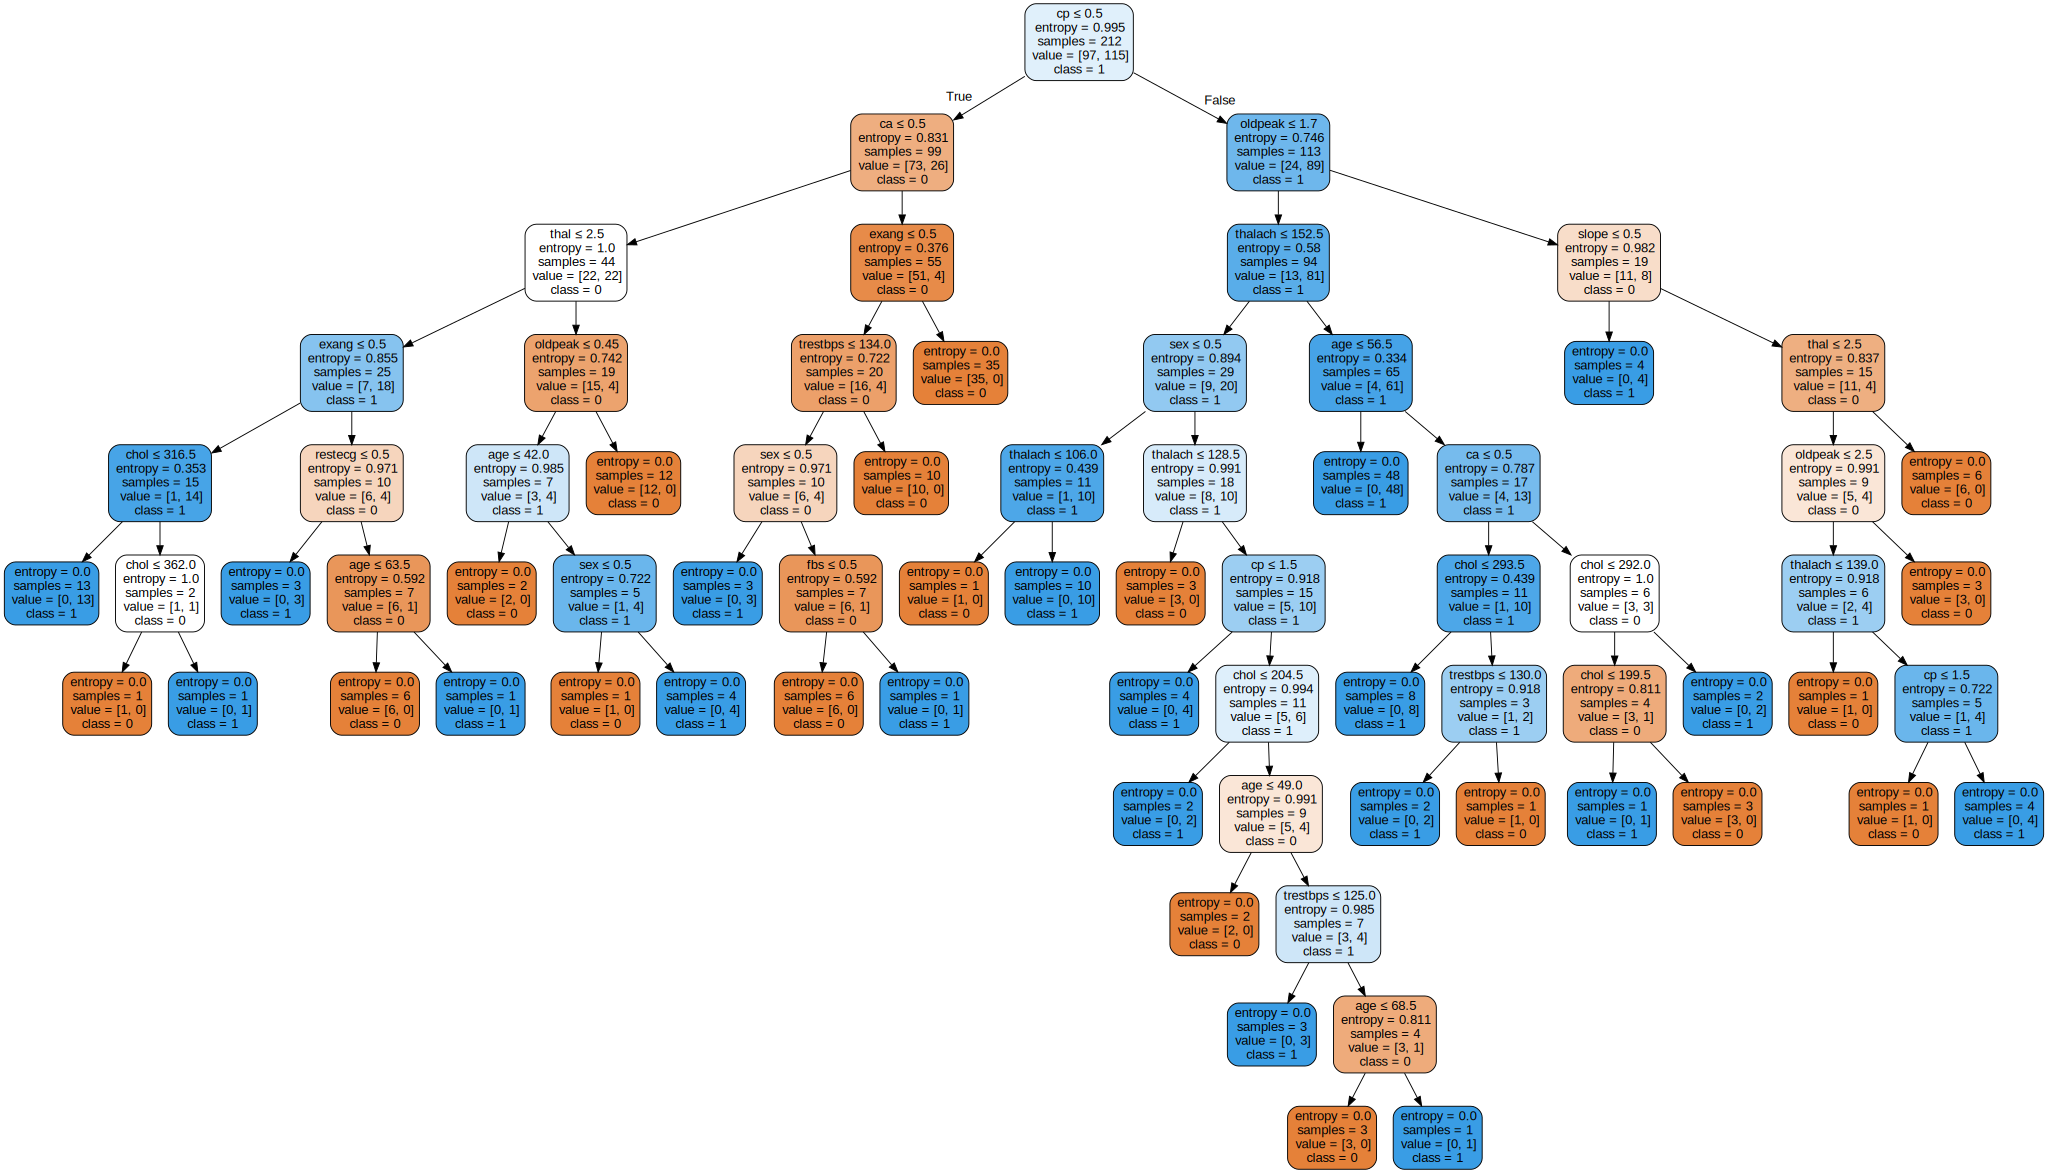

In [ ]:
# TO DO: Plot the resulting tree
dot_data = tree.export_graphviz(clf, out_file=None,
                     feature_names=XTrain.columns,
                     class_names=[str(class_label) for class_label in clf.classes_], rounded=True,
                     special_characters=True, filled= True)  #___TO DO___

# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph

As we've just seen, the DT generated is quite deep and wide. This is because DT tend to overfit the data. To avoid this, we can change the maximum depth and minimum number of leaf nodes allowed. Try different values for each parameter and find the best result. **Which combination works best?**

***Hint:* You might want to use a loop to try the different combinations**

<font color="red">

Max depth and Min samples leaf are the best combination to avoid the overfit of the data.
Trying different values and evaluating the model's performance, find the Max Depth: 3, Min Samples Leaf: 5. The accuracy on testing data is 83.52%  
</font>


In [ ]:
# TO DO: Create DT Classifiers with different maximum depths and minimum number of lead nodes allowed
#________TO DO_________

best_accuracy = 0
best_depth = 0
best_min_samples_leaf = 0

for max_depth in range(1, 20):  # Try different values for maximum depth
    for min_samples_leaf in range(1, 20):  # Try different values for minimum number of leaf nodes

        # Create and fit DT classifier with current parameters
        clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth, min_samples_leaf=min_samples_leaf)
        clf = clf.fit(XTrain, yTrain)

        # Calculate accuracy on testing data
        accuracy = clf.score(XTest, yTest)

        # Check if the current combination gives a better accuracy
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_depth = max_depth
            best_min_samples_leaf = min_samples_leaf

print("Best combination - Max Depth: {}, Min Samples Leaf: {}".format(best_depth, best_min_samples_leaf))
print("Best accuracy on testing data: {:.2f}%".format(best_accuracy * 100))

Best combination - Max Depth: 3, Min Samples Leaf: 5
Best accuracy on testing data: 83.52%


Plot the best DT you found and compare it with the previous one. ***Is it easier to follow?***

<font color="red"> It is easier to follow than previous one because of best maximum depth,minimum samples leaves, and accuracy. Most importantly, branching complexity is less than the previous one.

</font>

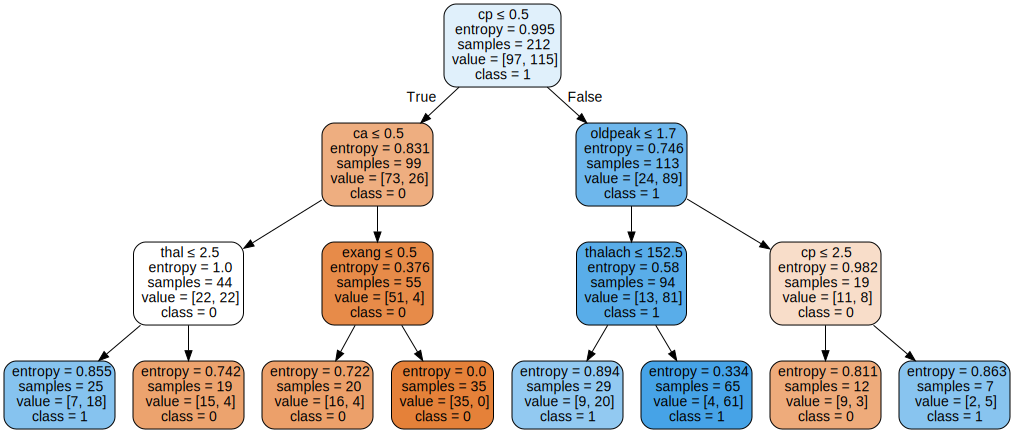

In [ ]:
# TO DO: Plot the resulting tree
#________TO DO_________
# TO DO: Plot the resulting tree
# Create and fit the best DT classifier
best_clf = tree.DecisionTreeClassifier(criterion="entropy", max_depth=best_depth, min_samples_leaf=best_min_samples_leaf)
best_clf = best_clf.fit(XTrain, yTrain)

# Plot the best DT
dot_data = tree.export_graphviz(best_clf, out_file=None,
                     feature_names=XTrain.columns,
                     class_names=[str(class_label) for class_label in best_clf.classes_], rounded=True,
                     special_characters=True, filled= True)  #___TO DO___

# Create the graphviz graph
graph = graphviz.Source(dot_data)
# Display the DT graph
graph
#________TO DO_________

On this lab, we've been using a split of training/test, and we have been taking decisions and changing hyperparameters (e.g. depth) based on the test performance. **Is this the correct methodology?**

<font color="red">I think this is not correct methodology by using a split of training/test and taking decisions and changing hyperparameters based on test performance. We should use a validation set and cross-validation techniques for more robust model assessment.

</font>